In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys,os
sys.path.append('..')
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.swarms.swarm import Swarm
from backtester.exoinfo import EXOInfo

import pandas as pd
import numpy as np
import scipy

In [3]:
TMQRPATH = os.getenv("TMQRPATH", '')

swarms = {}
for file in os.listdir(os.path.join(TMQRPATH, 'swarms')):
    swarm_name = file.replace('.swm','')
    print('Loading: '+ swarm_name)
    swarms[swarm_name] = Swarm.load(os.path.join(TMQRPATH, 'swarms', file))

Loading: ES_BearishCollarBW_Long_IchimokuCloud
Loading: CL_PutSpread_Short_MACross
Loading: ES_PutSpread_Short_PointAndFigurePatterns
Loading: CL_BullishCollarBW_Short_PointAndFigurePatterns
Loading: ES_CallSpread_Short_PointAndFigurePatterns
Loading: ES_PutSpread_Long_SwingPoint
Loading: CL_PutSpread_Short_RenkoPatterns_no_exit_on_patterns
Loading: NG_PutSpread_Short_PointAndFigurePatterns
Loading: CL_CallSpread_Short_MACross
Loading: CL_PutSpread_Short_VolatilityCompression
Loading: ES_PutSpread_Short_SwingPoint
Loading: NG_PutSpread_Long_RenkoPatterns_no_exit_on_patterns
Loading: ES_CallSpread_Long_PointAndFigurePatterns
Loading: CL_CallSpread_Long_MACross
Loading: CL_CallSpread_Short_PointAndFigurePatterns
Loading: NG_PutSpread_Short_BollingerBands
Loading: CL_BearishCollarBW_Short_BollingerBands
Loading: ES_BearishCollarBW_Long_BollingerBands
Loading: CL_BearishCollarBW_Short_IchimokuCloud
Loading: CL_BullishCollarBW_Long_IchimokuCloud
Loading: NG_CallSpread_Short_IchimokuCloud
Lo

MemoryError: 

### Available swarms

In [4]:
print("Swarms list:")
for swarm_name in sorted(swarms.keys()):
    print(swarm_name)

Swarms list:
CL_BearishCollarBW_Long_BollingerBands
CL_BearishCollarBW_Long_IchimokuCloud
CL_BearishCollarBW_Long_MACross
CL_BearishCollarBW_Long_RenkoPatterns_no_exit_on_patterns
CL_BearishCollarBW_Short_BollingerBands
CL_BearishCollarBW_Short_IchimokuCloud
CL_BearishCollarBW_Short_PointAndFigurePatterns
CL_BearishCollarBW_Short_RenkoPatterns_no_exit_on_patterns
CL_BearishCollarBW_Short_VolatilityCompression
CL_BullishCollarBW_Long_BollingerBands
CL_BullishCollarBW_Long_IchimokuCloud
CL_BullishCollarBW_Long_MACross
CL_BullishCollarBW_Long_PointAndFigurePatterns
CL_BullishCollarBW_Long_RenkoPatterns_no_exit_on_patterns
CL_BullishCollarBW_Long_SwingPoint
CL_BullishCollarBW_Long_VolatilityCompression
CL_BullishCollarBW_Short_IchimokuCloud
CL_BullishCollarBW_Short_MACross
CL_BullishCollarBW_Short_PointAndFigurePatterns
CL_BullishCollarBW_Short_RenkoPatterns_no_exit_on_patterns
CL_BullishCollarBW_Short_SwingPoint
CL_BullishCollarBW_Short_VolatilityCompression
CL_CallSpread_Long_BollingerBa

### Available EXOs

In [5]:
passive_exo = {}


print('Passive EXO list')
for matfile in os.listdir(os.path.join(TMQRPATH, 'mat')):    
    if 'strategy_' in matfile and '.mat' in matfile:
        exo = EXOInfo.from_matfile(os.path.join(TMQRPATH, 'mat', matfile))
        passive_exo[exo.exo_name()] = exo.exo_price_index()    

for exo in sorted(passive_exo.keys()):
    print(exo)

Passive EXO list
CLE_CLE_BearishCollarBrokenWing_EXO
CLE_CLE_BullishCollarBrokenWing_EXO
CLE_CLE_CallSpread_EXO
CLE_CLE_PutSpread_EXO
EP_EP_BearishCollarBrokenWing_EXO
EP_EP_BullishCollarBrokenWing_EXO
EP_EP_CallSpread_EXO
EP_EP_PutSpread_EXO
NGE_NGE_BearishCollarBrokenWing_EXO
NGE_NGE_BullishCollarBrokenWing_EXO
NGE_NGE_CallSpread_EXO
NGE_NGE_PutSpread_EXO
TYA_TYA_BearishCollarBrokenWing_EXO
TYA_TYA_BullishCollarBrokenWing_EXO
TYA_TYA_CallSpread_EXO
TYA_TYA_PutSpread_EXO
ZCE_ZCE_BearishCollarBrokenWing_EXO
ZCE_ZCE_BullishCollarBrokenWing_EXO
ZCE_ZCE_CallSpread_EXO
ZCE_ZCE_PutSpread_EXO
ZSE_ZSE_BearishCollarBrokenWing_EXO
ZSE_ZSE_BullishCollarBrokenWing_EXO
ZSE_ZSE_CallSpread_EXO
ZSE_ZSE_PutSpread_EXO


# Campaign composition

Copy/paste EXO or swarm names to the 'campaign_exposure' dictionary from lists above

In [6]:
campaign_exposure = {
     'CL_PutSpread_Short_IchimokuCloud': 1,     ## .5,90
     'CL_PutSpread_Short_SwingPoint': 1,        ## .5,90
     'CL_PutSpread_Short_BollingerBands': 1,    ## .5,90
     
     'CL_PutSpread_Long_SwingPoint': 1,         ## .5,90 
     'CL_PutSpread_Long_RenkoPatterns_no_exit_on_patterns': 1,         ## .5,90 
     'CL_PutSpread_Long_PointAndFigurePatterns': 1,         ## .5,90 
    
    
     #
     # Passive EXO positions
     #
     #'EP_BullishCollar_EXO': -1, # Short 1 EXO units
     
}

In [7]:
#def campaign_equity(swarms, exposure):

campaign_dict = {}
campaign_stats = {'NetProfit': 0.0, 'TradesCount': 0, 'CommissionSum': 0.0}

for camp_name, exposure in campaign_exposure.items():
    if camp_name in swarms:
        swarm_name = camp_name
        smgr = swarms[swarm_name]
        campaign_dict[swarm_name] = smgr.picked_equity
        
        # TODO: implement swarm statistics
        '''
        s = smgr.picked_stats        
        campaign_stats['NetProfit'] += s['NetProfit']
        campaign_stats['TradesCount'] += s['TradesCount']
        campaign_stats['CommissionSum'] += s['CommissionSum']
        '''
        
    elif camp_name in passive_exo:
        exo_equity = passive_exo[camp_name]
        campaign_dict[camp_name] = exo_equity.diff() * exposure
    
    
campaign_portfolio = pd.DataFrame(campaign_dict)
campaign_equity = campaign_portfolio.sum(axis=1)

### Campaign members equities

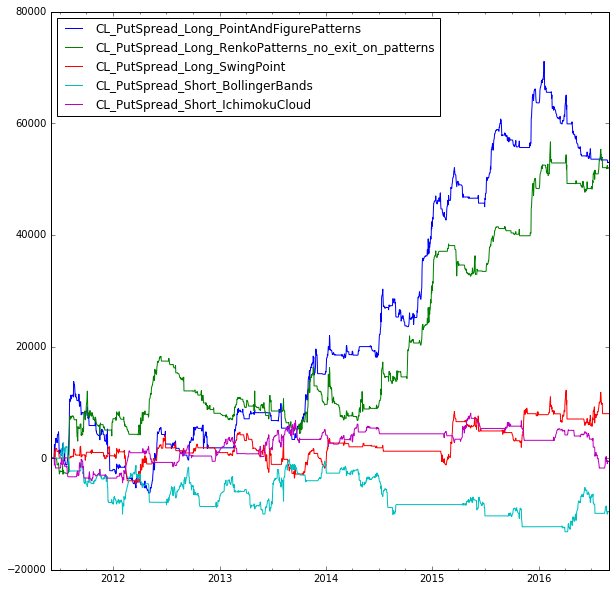

In [8]:
figsize(10,10)
campaign_portfolio.plot()

### Cumulative campaign equity

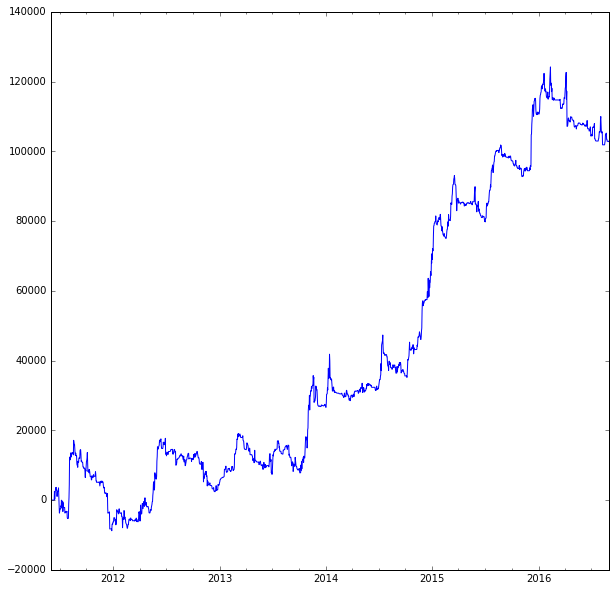

In [9]:
campaign_portfolio.sum(axis=1).plot()

# Campaign statistics

In [ ]:
print(campaign_stats)